# 1. Histogram - histplot()
# 2. Boxplot - boxplot()
# 3. Bar Graph - countplot()
# 4. Line Plot - lineplot()
### Use ci=False to remove the shaded area also called as 95% confidence interval
# 5. Scatter plot - scatterplot()
# 6.lmplot - lmplot() - Builds a line in scatter plot
# 7. Joint Plot - jointplot() - Combination of scatter plot and histogram
###      In joint plot we show kind function like 'hex', 'kde', 'reg'. To avoid overlapping we use kind='hex'
# 8. Violin plot - violinplot() - Shos deensity on Y-axis
### The white dot is median and the line is IQR, wider section is higher probablility and lower section is lower probability.
# 9. Strip plot - stripplot() - It is scatter plot used to compare categories.
# 10. Swarm plot - swarmplot() - similar to strip lot but avoid overlapping
###      Use dodge=True to show in seperate columns
# 11. Cat plot - catplot() - By default it is strip plot
###      We can incorporate multiple kind of plots in catplot like kind= point,bar,swarm,box
# 12. Pair plot - pairplot()
### Shows relationship between 2 or more numerical variables. Seperate by Hue - vars['column_name']
# 13. Heat Map - heatmap() - Shows corelation between variables
### To put numbers in the box we use annot = True
# 14. Plotly - Open source library, We have to import first
## import plotly.express as px

###    1. Histogram
###    2. Bar
###    3. scatter plot
###    4. box plot
###    5. 3D-plot

### plt.title("My First Histogram Graph")
### plt.xlim(3000,50000)
### plt.ylim(0,70)
### plt.xlabel("Price of cars")
### plt.ylabel("Frequency")
### sns.histplot(data=df,x='price' , color='orange');

#### Histogram - We can add bins and binwidth also
#### We can add KDE and let python system find out how many bins are required in graph
#### We use function --See Below
#### g = sns.FacetGrid(df,col='body_style')
#### g.map(sns.histplot,'price');

#### For Size - plt.figure(figsize=(15,7))
#### For rotation of legends - plt.xticks(rotation=45)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import Image

In [3]:
df = pd.read_csv('Batsman.csv')

In [4]:
df.head(5)

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


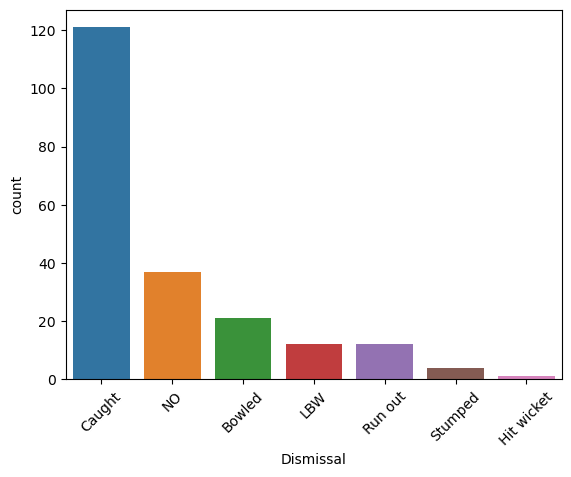

In [5]:
sns.countplot(data=df,x='Dismissal',order=df['Dismissal'].value_counts().index);
plt.xticks(rotation=45);

# Hint: Histogram and Countplot is always used in univariate variable.
# i.e. X-axis or Y-axis both cannot be used together.

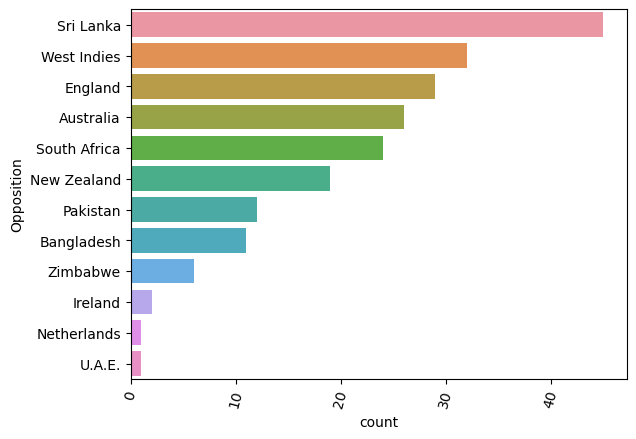

In [6]:
sns.countplot(data=df,y='Opposition',order=df['Opposition'].value_counts().index);
plt.xticks(rotation=75);

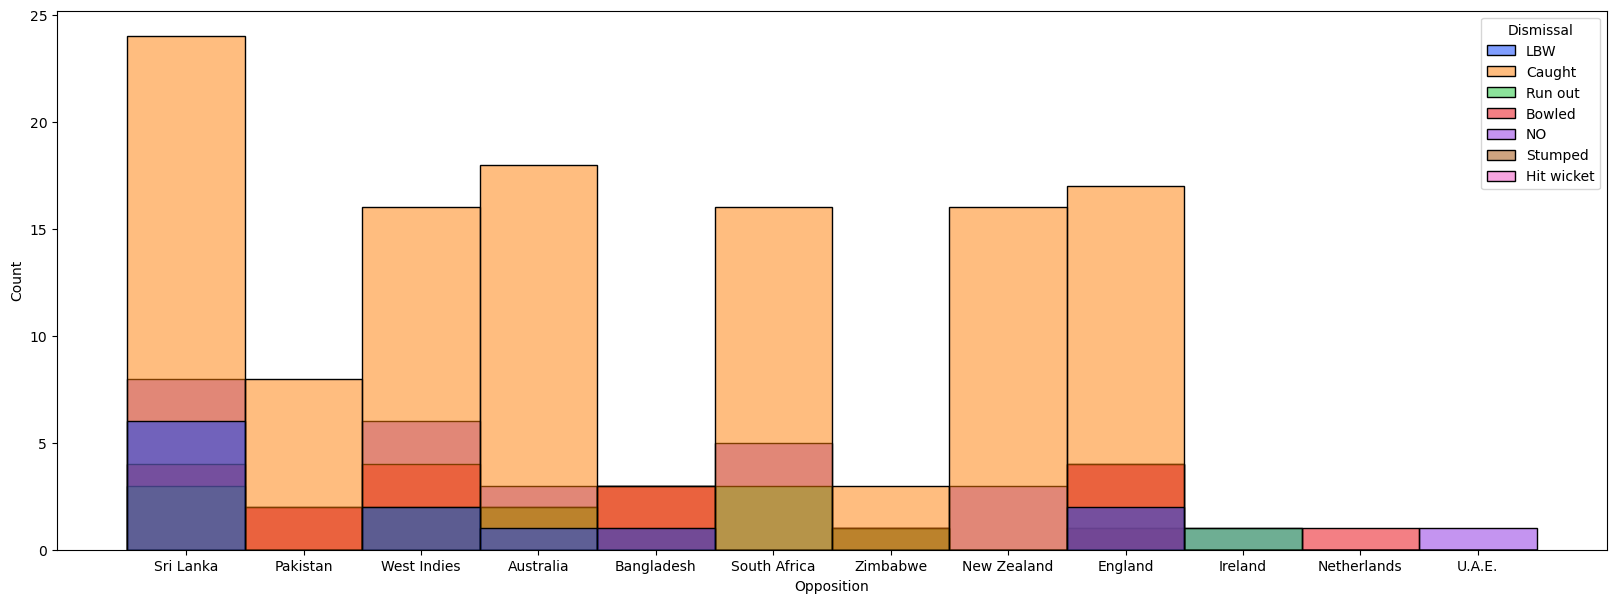

In [7]:
plt.figure(figsize=(20,7))
sns.histplot(data=df,x='Opposition',hue='Dismissal', palette='bright');

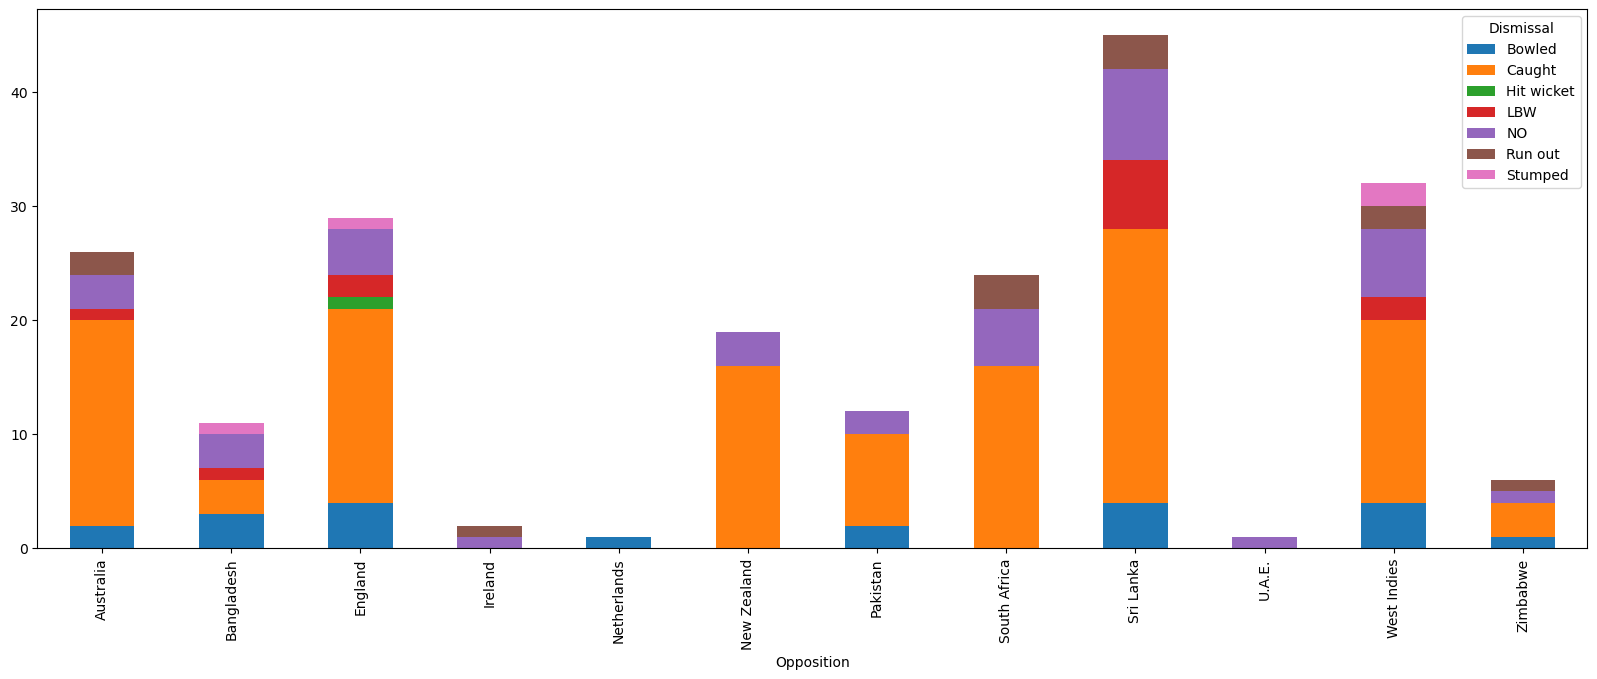

In [85]:
ct = pd.crosstab(df['Opposition'],df['Dismissal'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,7))
plt.show()

# If we have to do sum of a numerical column and show the results - Then in that case we will use 'estimator=np.sum' function iniside -- Very interesting

C:\Users\ayush\AppData\Local\Temp\ipykernel_21452\630401708.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df,x='RunsScored',y='Opposition',estimator=np.sum,ci=False)


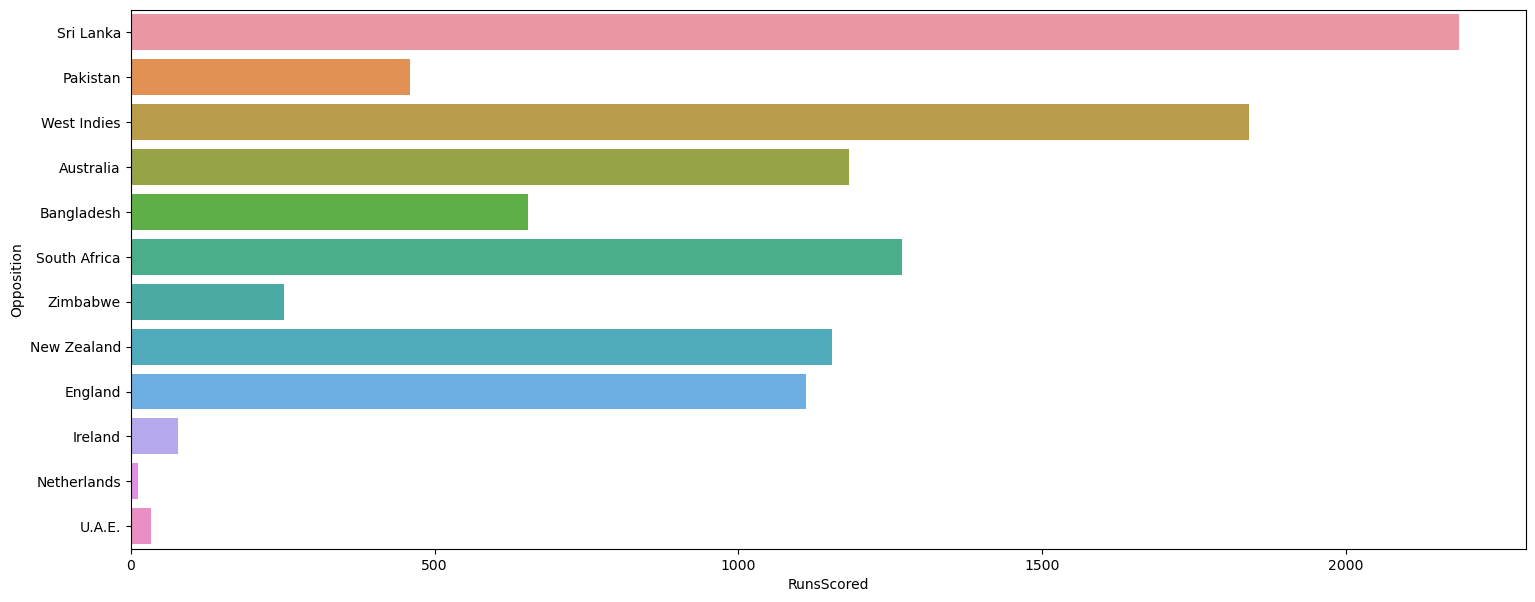

In [33]:
plt.figure(figsize=(18,7))
sns.barplot(data=df,x='RunsScored',y='Opposition',estimator=np.sum,ci=False)
plt.show()

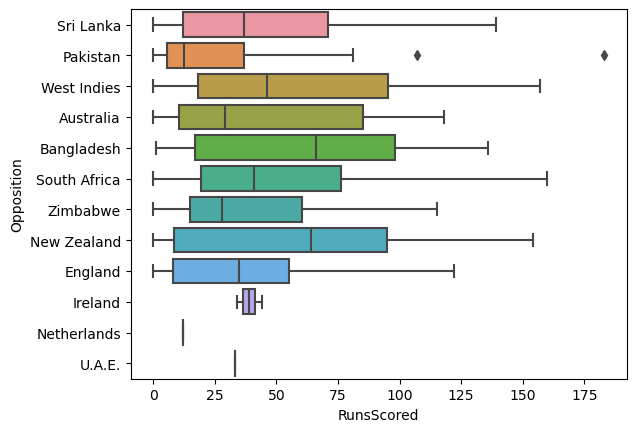

In [39]:
sns.boxplot(data=df,x='RunsScored',y='Opposition');

In [40]:
df[df['Opposition'] == 'Bangladesh']['RunsScored'].median()

66.0

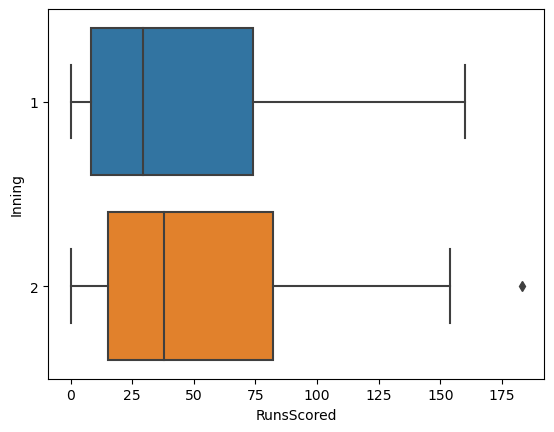

In [54]:
sns.boxplot(data=df,x='RunsScored',y='Inning',orient='h');
plt.show()

In [62]:
pd.crosstab(index=df['Inning'] , columns=df['RunsScored'],values=df['RunsScored'] , aggfunc='sum' , margins=True)

RunsScored,0,1,2,3,4,5,6,7,8,9,...,133,136,138,139,140,154,157,160,183,All
Inning,,,,,,,,,,,,,,,,,,,,,
1,0.0,2.0,6.0,6.0,4.0,5.0,NaN,14.0,32.0,36.0,...,NaN,NaN,138.0,NaN,NaN,NaN,157.0,160.0,NaN,4060
2,0.0,3.0,12.0,9.0,4.0,5.0,12.0,7.0,8.0,9.0,...,133.0,136.0,NaN,139.0,140.0,154.0,NaN,NaN,183.0,6172
All,0.0,5.0,18.0,15.0,8.0,10.0,12.0,21.0,40.0,45.0,...,133.0,136.0,138.0,139.0,140.0,154.0,157.0,160.0,183.0,10232


In [64]:
df.groupby('Inning')['RunsScored'].sum()

Inning
1    4060
2    6172
Name: RunsScored, dtype: int64

In [65]:
df['post_transform'] = df["Year"]>2012

In [66]:
df.head(5)

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year,post_transform
0,12,22,2,LBW,1,Sri Lanka,2008,False
1,37,67,2,Caught,2,Sri Lanka,2008,False
2,25,38,1,Run out,1,Sri Lanka,2008,False
3,54,66,1,Bowled,1,Sri Lanka,2008,False
4,31,46,1,LBW,2,Sri Lanka,2008,False


<Axes: xlabel='RunsScored', ylabel='post_transform'>

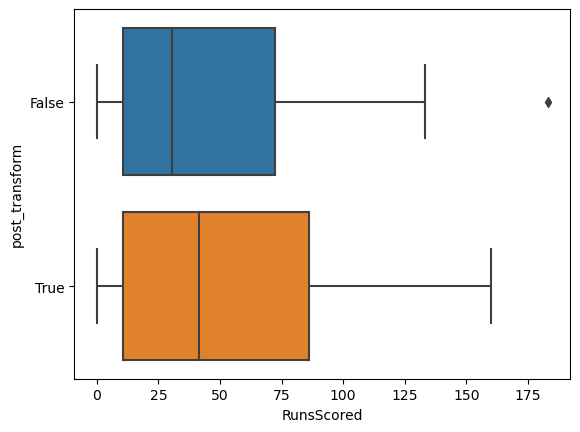

In [70]:
sns.boxplot(data=df,x='RunsScored',y='post_transform',orient='h')

C:\Users\ayush\AppData\Local\Temp\ipykernel_21452\4244662648.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df,x='Year',y='RunsScored',ci=False);


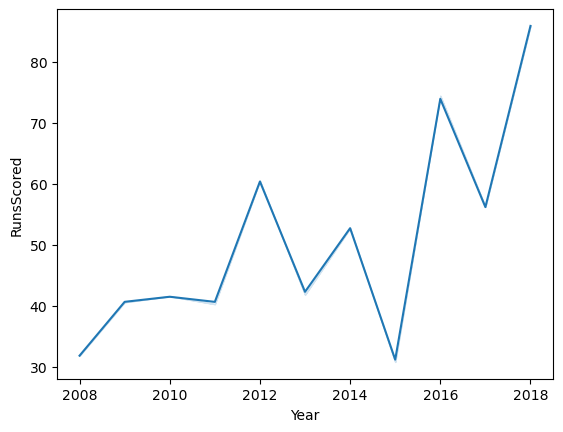

In [91]:
sns.lineplot(data=df,x='Year',y='RunsScored',ci=False);

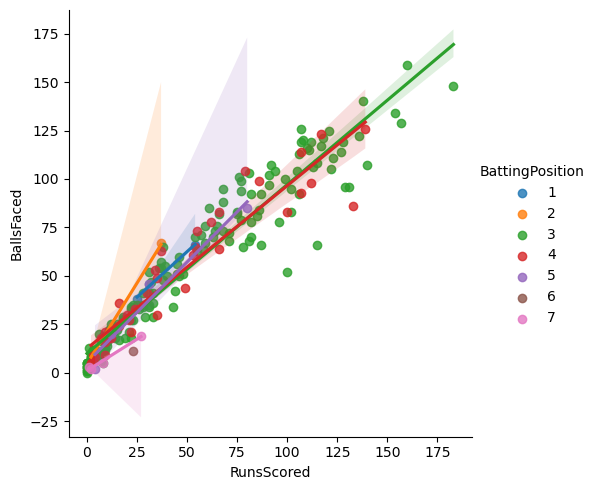

In [92]:
sns.lmplot(x="RunsScored", y="BallsFaced",hue='BattingPosition', data=df)
plt.show()

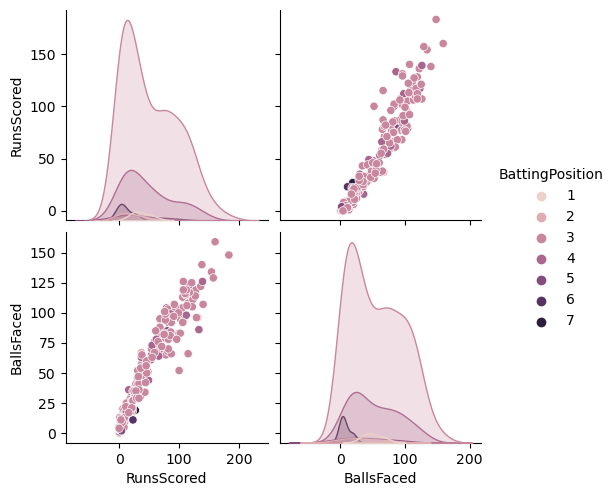

In [95]:
sns.pairplot(data=df,vars=['RunsScored','BallsFaced'] , hue='BattingPosition');

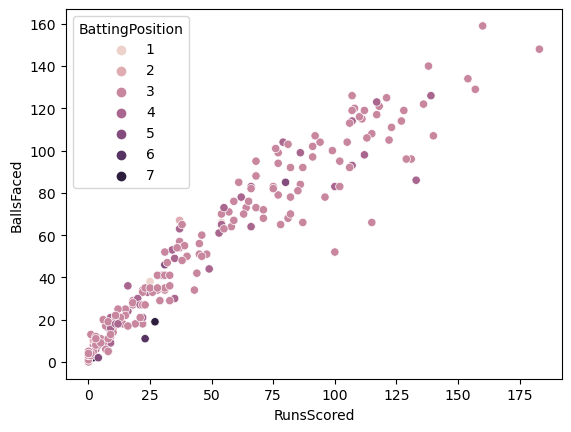

In [97]:
sns.scatterplot(x="RunsScored", y="BallsFaced",hue='BattingPosition', data=df);